# Estudi del *data set* hotel_review

## Objectiu

En aquest quadern estudirem una a una i en conjunt
les variables del *data set* de la pràctica entregable 
`hotel_review_analysis`
de l'assignatura `Aprenentage Automàtic`
del Dr. Juan Huguet. 

L'objectiu d'aquest estudi és determinar quines noves característiques 
podem extreure o completar des de fonts externes 
per tal de millorar l'*accuracy* del classificador 
que es preten implementar i 
d'aquesta forma poder subministrar a la cadena hotelera 
que ens ha contractat 
una resposta amb més fonament.

La resposta que s'espera són un conjunt de 
consells que li permetin elevar l'opinió dels clients.

## Carregam les dades

Procedim a carregar els registres dins un *data frame* per tal de poder fer-hi 
feina de forma còmoda.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_file_list = [
    'data/hotel_reviews_dataset_part_1.csv',
    'data/hotel_reviews_dataset_part_2.csv', 
    'data/hotel_reviews_dataset_part_3.csv',
    'data/hotel_reviews_dataset_part_4.csv']

df = pd.DataFrame()

for file in data_file_list:
    print(f"Loading {file}")
    df = pd.concat([df, pd.read_csv(file)], ignore_index = True)

Loading data/hotel_reviews_dataset_part_1.csv
Loading data/hotel_reviews_dataset_part_2.csv
Loading data/hotel_reviews_dataset_part_3.csv
Loading data/hotel_reviews_dataset_part_4.csv


Inspeccionam ...

In [3]:
df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


In [4]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


Ens crida l'atenció que la latitud i la longitud tenguin un recorregut tan petit. 
Sembla com si tots els hotels que la tenen informada, siguin de la mateixa regió. 
Alguns valors (de latitud i longitud) no estan informats.

La variable `days_since_review` no és numèrica (!). 
S'haurà d'analitzar el seu contingut per veure si pot ser 
transformada a numèrica (entera).

### Valoració de l'impacte dels valors *nan*

Miram si tenim valors *nan* a qualque columna ...

In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

Com ja havíem detectat, 
confirmam que **hi ha valors nuls** 
a les coordenades geogràfiques d'alguns registres.
Ho haurem de tenir en compte si interessàs classificar els hotels en categories
que depenguin de la seva ubicació i la inferim de les coordenades geogràfiques.

## Estudi de les variables predictores

### Llibreries addicionals

Per poder estudiar millor les variables que tenim 
necessitarem (instal·lar): 

In [6]:
# !conda install geopandas
## !pip install geopandas

#
# Aquesta llibreria amplia pandas amb eines que permeten tractaments geogràfics
#
import geopandas as gpd

### Variables que depenen de l'establiment

Al conjunt de dades subministrat hi ha variables que depenen de l'establiment hoteler i 
d'altres que són pròpiament de la revisió que ha fet el client.

Per tal de tenir una millor visió de les variables relacionades
amb l'establiment hoteler, 
les agruparem en un *data frame*:

In [7]:
hotel_columns = [
    'Hotel_Address',
    'Additional_Number_of_Scoring',
    'Average_Score',
    'Hotel_Name',
    'Total_Number_of_Reviews',
    'lat',
    'lng']

#
# Hem de dir-li a pandas que també volem els nuls perquè lat i lng en tenen
#
df_hotel = df[hotel_columns].groupby(hotel_columns, dropna = False).first().reset_index()

In [8]:
df_hotel

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Total_Number_of_Reviews,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,1403,52.360576,4.915968
1,1 15 Templeton Place Earl s Court Kensington a...,244,8.5,K K Hotel George,1831,51.491888,-0.194971
2,1 2 Serjeant s Inn Fleet Street City of London...,639,9.2,Apex Temple Court Hotel,2619,51.513734,-0.108751
3,1 3 Queens Garden Westminster Borough London W...,1058,7.7,The Park Grand London Paddington,4380,51.514218,-0.180903
4,1 3 Rue d Argentine 16th arr 75116 Paris France,26,8.4,Monhotel Lounge SPA,171,48.874348,2.289733
...,...,...,...,...,...,...,...
1489,Wiedner Hauptstra e 44 04 Wieden 1040 Vienna A...,260,8.0,Suite Hotel 900 m zur Oper,3461,48.193523,16.366915
1490,Wildpretmarkt 5 01 Innere Stadt 1010 Vienna Au...,82,8.9,Hotel Amadeus,717,48.210447,16.371578
1491,Wilton Place Knightsbridge Westminster Borough...,70,9.1,The Berkeley,232,51.502091,-0.157779
1492,Wrights Lane Kensington and Chelsea London W8 ...,1172,7.8,Holiday Inn London Kensington,5945,51.499981,-0.192879


Pel que sembla hi ha 1494 establiments.

A continuació farem un petit estudi del significat 
de cada variable i de les propietats que 
pensam que poden ésser útils per a l'[objectiu](#Objectiu)
del client.

#### Hotel_Address

És un camp de texte lliure que conté l'adreça de l'Hotel. 
El nom del païs sembla estar sempre al final del camp.

Segurament seria possible inferir les seves coordeandes geogràfiques 
a partir de l'adreça per tal de poder-li donar una puntuació 
segons la distància al centre del nucli de població o a monuments 
singulars. 
De totes formes, com que a la gran majoria dels establiments 
ja tenim les coordenades geogràfiques als camps `lat`i `lng`, 
en principi de l'adreça només 
**sembla d'interès l'extracció del nom del país**.

El país de l'establiment pot tenir interès a l'hora de confrontar 
les espectatives dels clients amb les ressenyes que han fet.

Feim unes proves per veure si es possible extreure el nom del país de forma fiable:

In [9]:
#
# El ds *naturalearth_lowres* té una representació de la terra per països
# També conté una columna (name) amb el nom de cada país
#
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country_list = world['name']

Vegem si és fàcil treure'n el nom del païs.

In [10]:
country = []
for address in df_hotel['Hotel_Address']:
    country_name = None
    i = 0
    while (country_name == None) and (i < len(country_list)):
        if address.endswith(country_list[i]):
            country_name = country_list[i]
        i += 1
    country.append(country_name)
df_hotel['Hotel_Country'] = country

In [11]:
df_hotel[['Hotel_Address', 'Hotel_Country']].head(5)

,Hotel_Address,Hotel_Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands
1,1 15 Templeton Place Earl s Court Kensington a...,United Kingdom
2,1 2 Serjeant s Inn Fleet Street City of London...,United Kingdom
3,1 3 Queens Garden Westminster Borough London W...,United Kingdom
4,1 3 Rue d Argentine 16th arr 75116 Paris France,France


In [12]:
df_hotel['Hotel_Country'].unique()

array(['Netherlands', 'United Kingdom', 'France', 'Spain', 'Italy',
       'Austria'], dtype=object)

Sembla que en el conjunt de dades tan sols tenim 6 països.

Per tant una **codificació del tipus *OHE* per la nova columna país** 
podria ser l'apropiada.

#### Additional_Number_of_Scoring

És un camp numèric enter. 
Sembla contenir el número de puntuacions addicionals que no 
estan contingudes al *data set* subministrat.

In [13]:
df_hotel['Additional_Number_of_Scoring'].describe()

count    1494.000000
mean      190.715529
std       245.254967
min         1.000000
25%        53.000000
50%       106.000000
75%       231.000000
max      2682.000000
Name: Additional_Number_of_Scoring, dtype: float64

#### Average_Score

Un camp amb un número decimal. 
Sembla ser la puntuació entre 0 i 10 que té l'establiment.
El seu valor més petit és 5.2

In [14]:
df_hotel['Average_Score'].describe()

count    1494.000000
mean        8.467135
std         0.548050
min         5.200000
25%         8.100000
50%         8.500000
75%         8.900000
max         9.800000
Name: Average_Score, dtype: float64

#### Hotel_Name

#### Total_Number_of_Reviews

#### Coordenades espaials (lat, lng)

Per tal de veure gràficament on són els hotels es representa la seva ubicació com a punts en un pla.

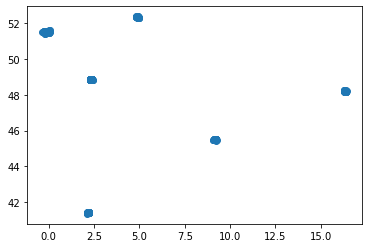

In [15]:
import matplotlib.pyplot as plt

# dibuixarem només un pic cada punt
dfgeol = df[['lng', 'lat']].groupby(['lng', 'lat']).first().reset_index()

plt.scatter(x = dfgeol['lng'], y = dfgeol['lat'])
plt.show()

In [16]:
dfgeol.shape

(1472, 2)

Sembla que les 1472 duples de coordenades estan molt concentrades a 6 localitzacions.

Anem a dibuixar-les damunt un mapamundi per veure on són.

In [17]:
# !conda install geopandas
# !pip install geopandas

import geopandas as gpd

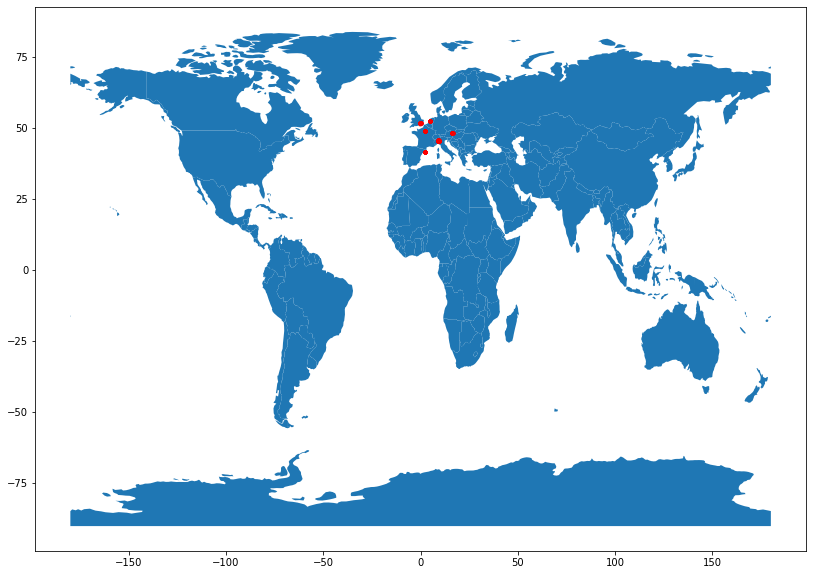

In [18]:
# la projecció EPSG:4326 és en coordenades geogràfiques (longitud, latitud)

gdf = gpd.GeoSeries(data = gpd.points_from_xy(dfgeol['lng'], dfgeol['lat']), 
                    crs = "EPSG:4326")

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot(ax = world.plot(figsize = (15, 10)), 
         marker = 'o', 
         color = 'red',
         alpha = 0.2,
         markersize = 10);

Sembla que els hotels que tenen les coordenades informades s'ubiquen a 6 països d'Europa ...

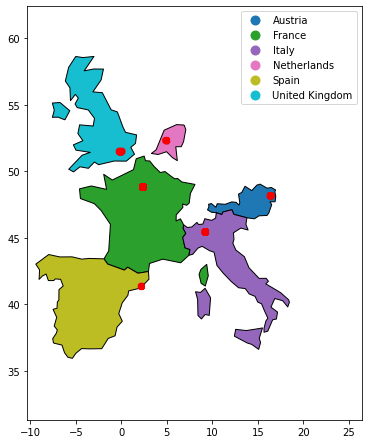

In [19]:
# Països
country_list = ['Spain',
                'France',
                'Italy', 
                'United Kingdom',
                'Netherlands',
                'Austria'
               ]

ax = world.loc[world['name'].isin(country_list), : ].plot(
    figsize = (6, 10),
    edgecolor = 'black',
    column = 'name', 
    legend = True
)

ax.set_xlim(left = dfgeol['lng'].min() - 10, right = dfgeol['lng'].max() + 10)
ax.set_ylim(bottom = dfgeol['lat'].min() - 10, top = dfgeol['lat'].max() + 10)

gdf.plot(ax = ax,
         color = 'red', 
         alpha = 0.1)

plt.show()

En concret sembla que a prop o dins d'una sola ciutat (turística) per a cada païs. 

Inicialment se pensava que podria ser d'interès crear una nova característica que fos 
l'`hemisferi` per tal de poder modelar quins són els mesos de l'any en que fa més calor per exemple. 
Però com que només estan situats dins l'hemisferi nord, no té sentit crear-la, 
al manco per aquest conjunt de dades. 

El que sí se podria intentar seria calcular la seva distància al mar, 
perquè combinada amb la latitud i el mes de l'any pot donar una idea del clima del mes.

##### Distància a la mar

Com que pot ser que ens pugui anar bé saber la distància al mar, 
serà necessari calcular un polígon del perfil dels continents.

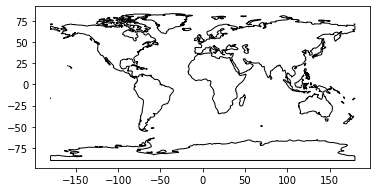

In [20]:
from shapely.ops import cascaded_union

polygons = gpd.GeoSeries(world['geometry'])
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary.plot(color = 'none')
plt.show()

Amb aquest perfil de la zona terrestre, 
podrem calcular la distància al llindar del polígon 
(que serà la distància fins a la mar).

In [21]:
# Ens asseguram de que el sistema de projecció sigui el mateix ...
boundary.crs = gdf.crs

# I el projectam a metres
boundarym = boundary.to_crs(crs = "EPSG:3857")

gdfm = gdf.to_crs(crs = "EPSG:3857")

In [22]:
# Calculam les distàncies
dist = []
for location in gdfm:
    dist.append(int(boundarym.boundary.distance(location)))

dist = pd.Series(dist)

In [23]:
# I miram que tal ha anat ... 

dist.describe()

count      1472.000000
mean     186357.788723
std      131439.637141
min        7880.000000
25%      128212.000000
50%      174894.000000
75%      242417.750000
max      514008.000000
dtype: float64

Vaja, ... la distància mínima que ens surt, són quasi 8 km !

Comprovarem si és cert ...

In [24]:
print(gdf[dist[dist == dist.min()].index])

580    POINT (2.19015 41.36844)
dtype: geometry


Aquestes coordenades estan a la vorera de mar, així que sembla que el càlcul que feim **no funciona**

[Localitzar a Google Maps](https://www.google.com/maps/search/41.36844+2.19015)

![Image](img/google_maps_1.png)

Probablement la resolució del polígon que feim servir no sigui prou gran 
com per a poder fer un càlcul precís.

### Variables de la valoració del client de l'hotel

#### Review_Date

#### Reviewer_Nationality

#### Negative_Review

#### Review_Total_Negative_Word_Counts

#### Positive_Review

#### Review_Total_Positive_Word_Counts

#### Total_Number_of_Reviews_Reviewer_Has_Given

#### Reviewer_Score

#### Tags

#### days_since_review

In [25]:
df['days_since_review'].head(5)

0     0 days
1     0 days
2     3 days
3     3 days
4    10 days
Name: days_since_review, dtype: object

Sembla que la columna `days_since_review` és una candidata a ser convertida a 
numèrica.

Comprovam si les unitats són sempre `day` o `days`

In [26]:
df[~df['days_since_review'].str.contains('days?$', regex = True)]['days_since_review'].value_counts()

Series([], Name: days_since_review, dtype: int64)

Sembla que l'unitat de mesura sempre són dies. 
Així que la podrem transformar de forma senzilla a numèrica 
per tal de poder fer-la servir de forma més eficaç.

Programarem l'extracció/transformació a dins el *pipeline* adient.